In [1]:
#Data extraction packages
import pickle
import numpy as np
import pandas as pd

#Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

#Modelling packages
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data_path = "/Users/dorothyjeyson/Kaggle/Text_classification/Data/"
#Dataframe
with open(data_path+"Preprocessed.pickle", "rb") as data:
    df = pickle.load(data)
    
#Features_Train
with open(data_path+"features_train.pickle", "rb") as data:
    features_train = pickle.load(data)

#Labels_Train
with open(data_path+"labels_train.pickle", "rb") as data:
    labels_train = pickle.load(data)

#Features_Test
with open(data_path+"features_test.pickle", "rb") as data:
    features_test = pickle.load(data)
    
#Labels_Test
with open(data_path+"labels_test.pickle", "rb") as data:
    labels_test = pickle.load(data)

Let's check the shape of our data

In [3]:
print("Dataframe shape :\t")
print(df.shape)
print("========================")
print("Features Train shape:\t")
print(features_train.shape)
print("Labels Train shape:\t")
print(labels_train.shape)
print("========================")
print("========================")

print("Features Test shape:\t")
print(features_test.shape)
print("Labels Test shape:\t")
print(labels_test.shape)

Dataframe shape :	
(2113, 7)
Features Train shape:	
(1796, 300)
Labels Train shape:	
(1796,)
Features Test shape:	
(317, 300)
Labels Test shape:	
(317,)


Hyperparameter Tuning

In [4]:
#SVC model's hyperparameter
svc = svm.SVC(random_state=8)
print("Parameters in a support vector machine :\n")
pprint(svc.get_params())

Parameters in a support vector machine :

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


https://github.com/miguelfzafra/Latest-News-Classifier/tree/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training

### Randomised Grid Search CV

In [7]:
#C
C = [0.0001,0.001,0.01]

#gamma
gamma = [0.0001,0.001,0.01, 0.1,1,10,100]

#degree
degree = [1,2,3,4,5]

#kernel
kernel = ['linear','rbf','poly']

#probability
probability = [True]

random_grid = {'C':C,
              'gamma':gamma,
              'degree':degree,
              'kernel':kernel,
              'probability':probability}
pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [34]:
#Definition of random search
random_search = RandomizedSearchCV(estimator=svc,
                                  param_distributions=random_grid,
                                  n_iter=50,
                                  scoring='accuracy',
                                  cv=3,
                                  verbose=1,
                                  random_state=8)
# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=8, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', random

In [35]:
print("The best hyperparameters from Random search are:")
pprint(random_search.best_params_)
print("The mean accuracy of a model with these hyperparameters is: ")
print(random_search.best_score_)

The best hyperparameters from Random search are:
{'C': 0.01, 'degree': 4, 'gamma': 10, 'kernel': 'poly', 'probability': True}
The mean accuracy of a model with these hyperparameters is: 
0.5389755011135857


After that, we can do a more exhaustive search centered in those values:

### Grid Search CV

In [16]:
C = [0.0001,0.001,0.01,0.1]
degree = [3,4,5]
gamma = [1,10,100]
probability = [True]

param_grid = [
    {'C':C, 'degree':degree,'kernel':['linear'],'gamma':gamma,'probability':probability},
    {'C':C, 'degree':degree,'kernel':['rbf'],'gamma':gamma,'probability':probability},
    {'C':C, 'degree':degree,'kernel':['poly'],'gamma':gamma,'probability':probability}
]

cv_sets = ShuffleSplit(n_splits=3, test_size=0.33, random_state=8)
grid_search = GridSearchCV(estimator=svc, 
                                  param_grid= param_grid,
                                  cv = cv_sets,
                                  scoring='accuracy',
                                 verbose =1)
#fit the grid search to data
grid_search.fit(features_train,labels_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 21.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='wa...
                          'gamma': [1, 10, 100], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'gamma': [1, 10, 100], 'kernel': ['poly'],
            

In [18]:
print("The best hyperparameters from Random search are:")
pprint(grid_search.best_params_)
print("The mean accuracy of a model with these hyperparameters is: ")
print(grid_search.best_score_)

The best hyperparameters from Random search are:
{'C': 0.01, 'degree': 3, 'gamma': 10, 'kernel': 'poly', 'probability': True}
The mean accuracy of a model with these hyperparameters is: 
0.5716694772344013


Let's save the best model

In [20]:
best_svc = grid_search.best_estimator_

In [21]:
best_svc

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

### Model fit and performance

Now fitting the best_svc model to our training data

In [22]:
best_svc.fit(features_train, labels_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
    max_iter=-1, probability=True, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

Let's save the predictions

In [23]:
svc_pred = best_svc.predict(features_test)

The conditional class probabilities can be obtained by typing:

svc_pred = best_svc.predict_proba(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [25]:
train_pred = best_svc.predict(features_train)
print("Training accuracy is :")
print(accuracy_score(labels_train, train_pred))

Training accuracy is :
0.6837416481069042


#### Test accuracy

In [26]:
print("Testing accuracy is :")
print(accuracy_score(labels_test, svc_pred))

Testing accuracy is :
0.20504731861198738


#### Classification report

In [27]:
print("Classification report")
print(classification_report(labels_test,svc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.27      0.13      0.18        76
           1       0.17      0.06      0.09        49
           2       0.11      0.03      0.05        64
           3       0.21      0.70      0.33        67
           4       0.14      0.05      0.07        61

    accuracy                           0.21       317
   macro avg       0.18      0.19      0.14       317
weighted avg       0.18      0.21      0.15       317



#### Confusion matrix

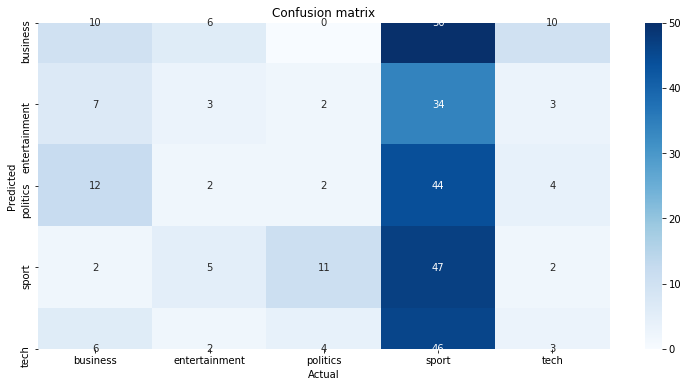

In [29]:
aux_df = df[['Category','CategoryCode']].drop_duplicates().sort_values('CategoryCode')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix,
           annot=True,
            xticklabels=aux_df['Category'].values,
            yticklabels=aux_df['Category'].values,
            cmap='Blues'
           )
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Let's see if the hyperparameter tuning process has returned a better model:

In [30]:
base_model = svm.SVC(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.2113564668769716

In [31]:
best_svc.fit(features_train, labels_train)
accuracy_score(labels_test, best_svc.predict(features_test))

0.20504731861198738

We'll create a dataset with a model summary to compare models:

In [32]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_svc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [33]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.683742,0.205047


Let's save the model and this dataset:

In [37]:
#file_path="/Users/dorothyjeyson/Kaggle/Text_classification/Modelling/"
with open('Models/best_svc.pickle', 'wb') as output:
    pickle.dump(best_svc, output)
    
with open('Models/df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)